<a href="https://colab.research.google.com/github/ankit-thealchemist/tensorflow/blob/main/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
import datetime
%load_ext tensorboard
!rm -rf ./logs/fit

In [ ]:
print(tf.__version__)
print(tf.keras.__version__)

2.3.0
2.4.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

7

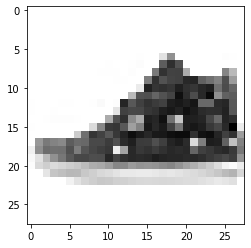

In [ ]:
plt.imshow(train_images[221],cmap= plt.cm.binary)
train_labels[221]

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000,28,28,1))

In [ ]:
test_images = test_images.reshape((10000,28,28,1))

In [ ]:
train_images = train_images.astype('float')/255
test_images = test_images.astype('float')/255

In [ ]:
#now making the model 
model = keras.Sequential(name = "fashion_mnist")


In [ ]:
# adding the layer one by one 
# First convolutional layer. 
# Number of neurons = 32
# filter(kernel) size = 3x3
# Activation function = Relu
# input data (images) size (height, width, channels) = (28, 28, 1)
# Channels is 'colors' here. Since fashion MNIST images are grayscale, number of colors = 1, hence, channels = 1
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),))

In [ ]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
#adding the max pooling layer
model.add(layers.MaxPooling2D((2,2)))
#adding the droppout layer for more accuracy
#model.add(layers.Dropout(.5))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
#adding the max pooling layer
model.add(layers.MaxPooling2D((2,2)))
#adding the droppout layer for more accuracy
#model.add(layers.Dropout(.5))

In [ ]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)       

In [ ]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)       

In [ ]:
#flatting the layer to connect further
model.add(layers.Flatten())

In [ ]:
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)       

In [ ]:
#Creating the dense layer for further connection 
model.add(layers.Dense(128,activation='relu'))
# Adding the last layer for the classification of the various items adding the softmax activation for the probability distribution 

model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)       

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
%tensorboard --logdir logs/fit

In [ ]:
#now training the model by shuffeling and validating the data of 10%

model.fit(train_images,train_labels,epochs=40,batch_size =  512,shuffle = True,validation_split= 0.1,callbacks=[tensorboard_callback])

Epoch 1/40
  1/106 [..............................] - ETA: 0s - loss: 2.3088 - accuracy: 0.0879WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
106/106 [==============================] - 2s 19ms/step - loss: 0.7765 - accuracy: 0.7105 - val_loss: 0.4877 - val_accuracy: 0.8140
Epoch 2/40
106/106 [==============================] - 2s 17ms/step - loss: 0.4686 - accuracy: 0.8302 - val_loss: 0.3802 - val_accuracy: 0.8620
Epoch 3/40
106/106 [==============================] - 2s 16ms/step - loss: 0.3988 - accuracy: 0.8574 - val_loss: 0.3438 - val_accuracy: 0.8737
Epoch 4/40
106/106 [==============================] - 2s 16ms/step - loss: 0.3582 - accuracy: 0.8696 - val_loss: 0.3175 - val_accuracy: 0.8910
Epoch 5/40
106/106 [==============================] - 2s 17ms/step

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1925 - accuracy: 0.9332
